<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

C:\Users\06650\AppData\Local\Temp\ipykernel_16872\4278381401.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(0, inplace=True)  # Приклад, розглядаючи відсутні значення як 0, але це залежить від конкретної ситуації
C:\Users\06650\AppData\Local\Temp\ipykernel_16872\4278381401.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['SalePrice'] = label_encoder.fit_transform(X['SalePrice'])


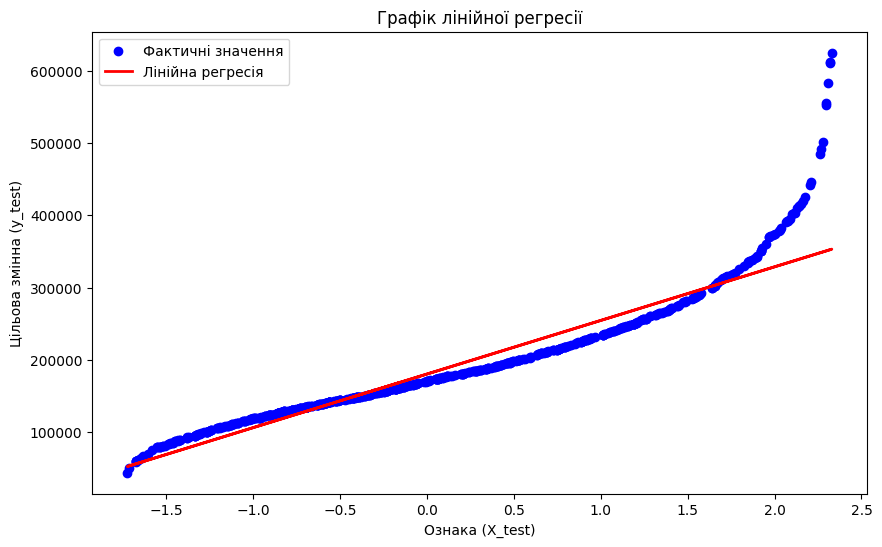

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
# Завантаження даних
data = pd.read_csv('C:/Users/06650/Downloads/AmesHousing.csv')

# Вивчення структури даних та характеристик ознак
print(data.info())
print(data.describe())

# Вибір цільової змінної та ознак для регресії
X = data[['SalePrice']]
y = data['SalePrice']

# Обробка відсутніх значень
X.fillna(0, inplace=True)  # Приклад, розглядаючи відсутні значення як 0, але це залежить від конкретної ситуації

# Перетворення категоріальних ознак у числові (за необхідності)
label_encoder = LabelEncoder()
X['SalePrice'] = label_encoder.fit_transform(X['SalePrice'])

# Масштабування ознак (якщо потрібно)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Розділення даних
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Побудова моделі регресії
model = LinearRegression()
model.fit(X_train, y_train)

# Оцінка моделі
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Середньоквадратична помилка (MSE):", mse)
print("Коефіцієнт детермінації (R^2):", r2)
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Фактичні значення')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Лінійна регресія')
plt.xlabel('Ознака (X_test)')
plt.ylabel('Цільова змінна (y_test)')
plt.legend()
plt.title('Графік лінійної регресії')
plt.show()

# Візуалізація результатів (за потреби)